In [1]:
import pandas as pd
pkExport = r"C:\Research\Ethane\SantaClara2\PeakExport_santa clara 318_RFADS2047_18-03-2016-21-09-43_A_Standard.dat"
pythonPeaks = "C:\Research\Ethane\SantaClara2\SurveyExport_santa clara 318_RFADS2047_18-03-2016-21-09-43_A_Standard_indications.json"
datExport = "C:\Research\Ethane\SantaClara2\SurveyExport_santa clara 318_RFADS2047_18-03-2016-21-09-43_A_Standard.dat"

df1 = pd.read_table(pkExport,delim_whitespace=True)
df2 = pd.read_json(pythonPeaks,convert_dates=False)
datf = pd.read_table(datExport,delim_whitespace=True)


C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Comparing dispositions
translation = {1:"NATURAL_GAS", 2:"NOT_NATURAL_GAS", 3:"POSSIBLE_NATURAL_GAS", 4:"VEHICLE_EXHAUST"}
import numpy as np
for p3 in df1.iterrows():
    dist = p3[1].DISTANCE
    matches = df2[abs(df2.DISTANCE-dist) < 1]
    if len(matches) == 1:
        if ((translation[p3[1].Disposition] == np.asarray(matches.VERDICT)[0]) and
            (p3[1].PASSED_AUTO_THRESHOLD == np.asarray(matches.PASSED_THRESHOLD)[0])):
            continue
        else:
            print "Peak %d at distance %.0f, epoch time: %.0f" % (p3[0], dist, p3[1].EPOCH_TIME)
            print "  Disposition (PCubed vs Python): %s vs %s" % (translation[p3[1].Disposition], np.asarray(matches.VERDICT)[0])
            print "  Amplitude (PCubed vs Python): %.3g vs %.3g" % (p3[1].AMPLITUDE, np.asarray(matches.AMPLITUDE)[0])
            print "  Ethane Ratio (PCubed vs Python): %.3g+/-%.3g vs %.3g+/-%.3g" % (p3[1].EthaneRatio, p3[1].EthaneRatioSdev, 
                                                                     np.asarray(matches.ETHANE_RATIO)[0], np.asarray(matches.ETHANE_RATIO_SDEV)[0])
            print "  Ethylene Ratio (PCubed vs Python): %.3g+/-%.3g vs %.3g+/-%.3g" % (p3[1].EthyleneRatio, p3[1].EthyleneRatioSdev, 
                                                                     np.asarray(matches.ETHYLENE_RATIO)[0], np.asarray(matches.ETHYLENE_RATIO_SDEV)[0])
            print "  Confidence (PCubed vs Python): %.3g vs %.3g" % (p3[1].ClassificationConfidence, np.asarray(matches.CONFIDENCE)[0])
            print "  Passed threshold: %d vs %d" % (p3[1].PASSED_AUTO_THRESHOLD, np.asarray(matches.PASSED_THRESHOLD)[0])
                
    else:
        print "Peak %d at distance %.0f, epoch time: %.0f has %d matches" % (p3[0], dist, p3[1].EPOCH_TIME, len(matches))
        print "  Disposition (PCubed): %s" % (translation[p3[1].Disposition],)
        print "  Amplitude (PCubed): %.3g, Sigma (PCubed): %.3g" % (p3[1].AMPLITUDE, p3[1].SIGMA)
        print "  Ethane Ratio (PCubed): %.3g+/-%.3g" % (p3[1].EthaneRatio, p3[1].EthaneRatioSdev,)
        print "  Ethylene Ratio (PCubed): %.3g+/-%.3g" % (p3[1].EthyleneRatio, p3[1].EthyleneRatioSdev,) 
        print "  Confidence (PCubed): %.3g" % (p3[1].ClassificationConfidence,)
        if len(matches) == 0:
            # Try to find closest match
            sel = np.argmin(abs(df2.DISTANCE-dist))
            closest = df2.iloc[sel]
            if abs(closest.DISTANCE - dist) > 5:
                print "  NO MATCH within 5m"
            else:
                print "    Closest match at distance: %.0f" % closest.DISTANCE
                print "    Disposition (Python): %s" % closest.VERDICT
                print "    Amplitude (Python): %.3g, Sigma (Python): %.3g" % (closest.AMPLITUDE, closest.SIGMA)
                print "    Ethane Ratio (Python): %.3g+/-%.3g" % (closest.ETHANE_RATIO, closest.ETHANE_RATIO_SDEV,)
                print "    Ethylene Ratio (Python): %.3g+/-%.3g" % (closest.ETHYLENE_RATIO, closest.ETHYLENE_RATIO_SDEV,)
                print "    Confidence (Python): %.3g" % (closest.CONFIDENCE,)
            


Peak 87 at distance 29528, epoch time: 1458338770 has 0 matches
  Disposition (PCubed): NOT_NATURAL_GAS
  Amplitude (PCubed): 0.283, Sigma (PCubed): 20.2
  Ethane Ratio (PCubed): -0.00757+/-0.00494
  Ethylene Ratio (PCubed): -0.037+/-0.00949
  Confidence (PCubed): 0.95
  NO MATCH within 5m
Peak 134 at distance 37835, epoch time: 1458340463 has 0 matches
  Disposition (PCubed): NOT_NATURAL_GAS
  Amplitude (PCubed): 0.588, Sigma (PCubed): 4.39
  Ethane Ratio (PCubed): 0.00566+/-0.00444
  Ethylene Ratio (PCubed): 0.00341+/-0.00577
  Confidence (PCubed): 0.95
    Closest match at distance: 37836
    Disposition (Python): NOT_NATURAL_GAS
    Amplitude (Python): 0.588, Sigma (Python): 4.83
    Ethane Ratio (Python): 0.00574+/-0.00446
    Ethylene Ratio (Python): 0.00248+/-0.00569
    Confidence (Python): 0.95
Peak 172 at distance 59136, epoch time: 1458344159 has 0 matches
  Disposition (PCubed): POSSIBLE_NATURAL_GAS
  Amplitude (PCubed): 0.0468, Sigma (PCubed): 8.97
  Ethane Ratio (PCubed):

<IPython.core.display.Javascript object>


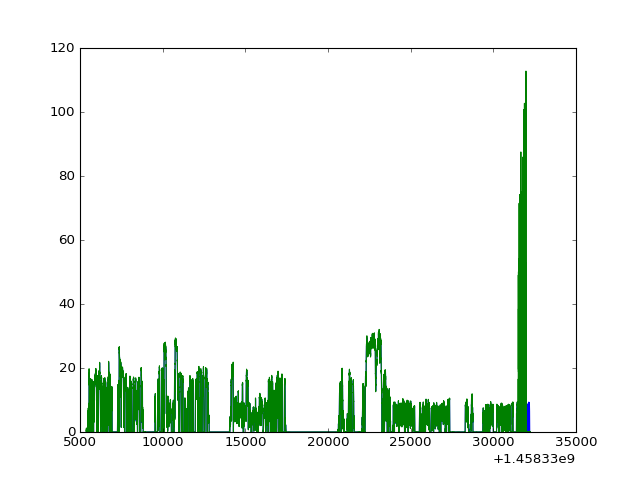

<IPython.core.display.Javascript object>


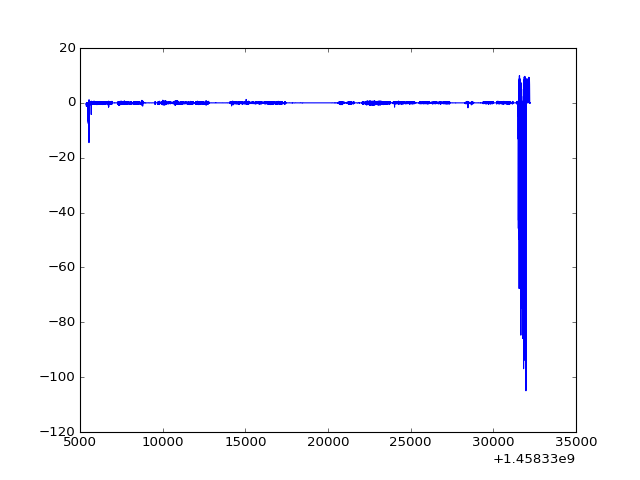

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371000 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

plt.close('all')
lat = np.asarray(datf.GPS_ABS_LAT)
lng = np.asarray(datf.GPS_ABS_LONG)
fit = np.asarray(datf.GPS_FIT)
t = np.asarray(datf.EPOCH_TIME)
dist = []
speed = []
when = []
for i in range(1,len(lat)):
    dist.append(haversine(lng[i-1], lat[i-1], lng[i], lat[i]))
    speed.append(dist[-1]/(t[i]-t[i-1]))
    when.append(0.5*(t[i]+t[i-1]))
plt.figure("Speed (In car: blue, In cloud: green)")
ax1 = plt.subplot(1,1,1)
plt.plot(datf.EPOCH_TIME, datf.CAR_SPEED, when, speed)
plt.figure("Speed Differences")
plt.subplot(1,1,1,sharex=ax1)
plt.plot(when, np.asarray(datf.CAR_SPEED)[:-1] - speed)

<IPython.core.display.Javascript object>


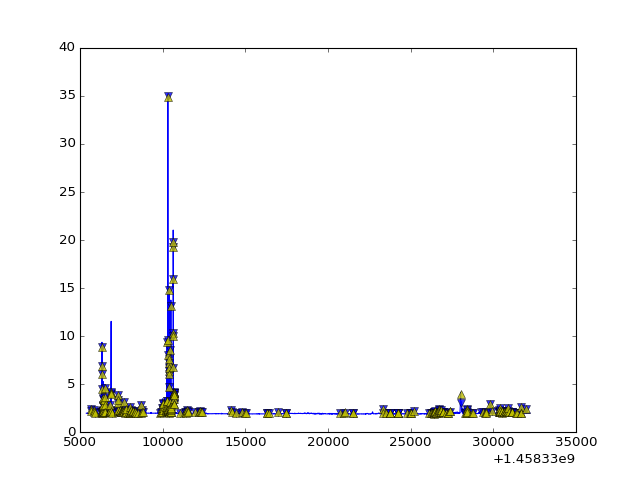

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

target = 0
plt.close('all')
plt.plot(datf.EPOCH_TIME - target, datf.CH4)
plt.plot(df1.EPOCH_TIME - target, df1.CH4, 'vb', df2.EPOCH_TIME - target, df2.CH4, '^y', alpha = 0.8, ms = 8)